In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

dataset_path = 'Path to Dataset'

In [ ]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        for file in os.listdir(label_folder):
            img_path = os.path.join(label_folder, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.GaussianBlur(img, (3, 3), 0)
            img = cv2.medianBlur(img, 3)
            img = img / 255.0
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

x, y = load_images_from_folder(dataset_path)
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3), padding='same'),
    MaxPooling2D(),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.7),
    Dense(2, activation='softmax')
])

optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,314 (8.08 MB)

 Trainable params: 2,117,122 (8.08 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=16)


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.7661 - loss: 1.7471 - val_accuracy: 0.9109 - val_loss: 0.5241
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.8693 - loss: 0.8208 - val_accuracy: 0.4950 - val_loss: 0.7911
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.8963 - loss: 0.3593 - val_accuracy: 0.5000 - val_loss: 0.9369
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.8823 - loss: 0.3868 - val_accuracy: 0.5000 - val_loss: 1.0934
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.9131 - loss: 0.3023 - val_accuracy: 0.6683 - val_loss: 0.5430
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.9156 - loss: 0.2152 - val_accuracy: 0.5248 - val_loss: 1.2751
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - accuracy: 0.9390 - loss: 0.1388 - val_accuracy: 0.5198 - val_loss: 1.7994
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - accuracy: 0.9475 - loss: 0.1588 - val_accurac

In [ ]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Loss: {loss:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8495 - loss: 0.7111
Validation Accuracy: 83.17%
Validation Loss: 0.7997


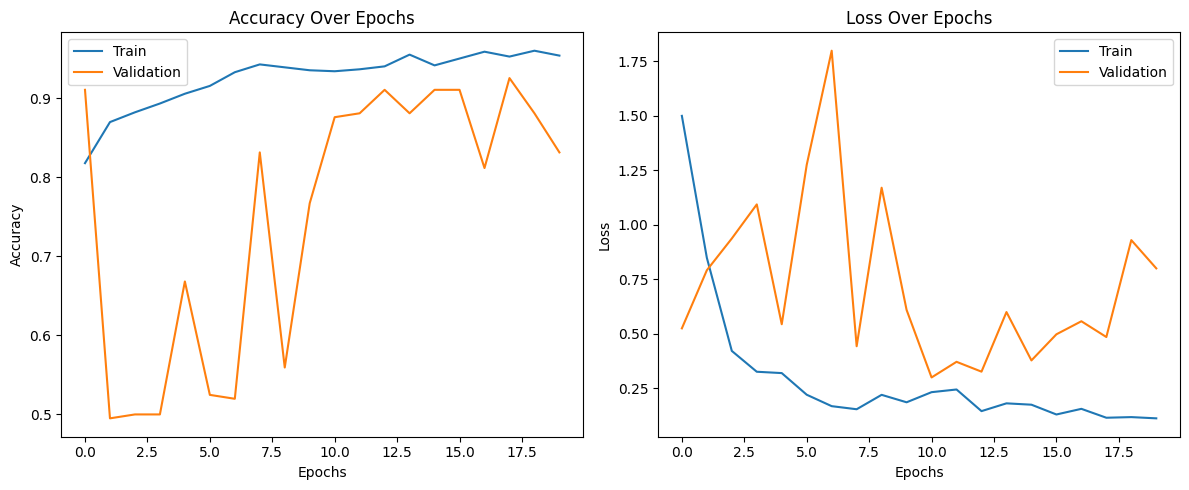

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


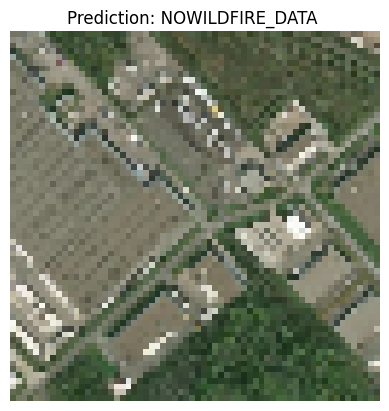

In [ ]:
test_img_path = 'Path to image'
test_img = cv2.imread(test_img_path)
test_img = cv2.resize(test_img, (64, 64))
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = test_img / 255.0
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)[0]
pred_class = le.classes_[np.argmax(prediction)]
confidence = np.max(prediction) * 100

plt.imshow(test_img[0])
plt.title(f"Prediction: {pred_class} ")
plt.axis('off')
plt.show()
